In [1]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageDraw2, ImageFont
from pathlib import Path

In [2]:
CWD = Path('.')
DATA = CWD/'data'
path = DATA/'src'/'symptom.png'

In [3]:
hindi = DATA/'fonts'/'indic'/'hindi.ttf'
tamil = DATA/'fonts'/'indic'/'tamil.ttf'

ENGLISH_TEXT = "What is the plan for today?"
HINDI_TEXT = "आज के लिए क्या योजना है?"
TAMIL_TEXT = "இன்றைய திட்டம் என்ன?"

ENGLISH_TEXT_BIG = '''What is the plan for today? 
And here goes the second line which is very big for instance'''
HINDI_TEXT_BIG = '''आज के लिए क्या योजन
ा है? और यहाँ दूसरी  ाइन
जात ी हैजो उदाहरण 
के लिए बहुत बड़ी है'''
TAMIL_TEXT_BIG = '''இன்றைய திட்டம் என்ன?
இங்கே இரண்டாவது வரி 
செல்கிறது, இது உதாரணமாக மிகப் பெரியது'''

In [25]:
img = Image.open(path).convert('RGBA')

In [26]:
draw = ImageDraw.Draw(img)

In [27]:
draw.rectangle([(100, 25), (400, 150)], fill="#ddffff", outline="blue")

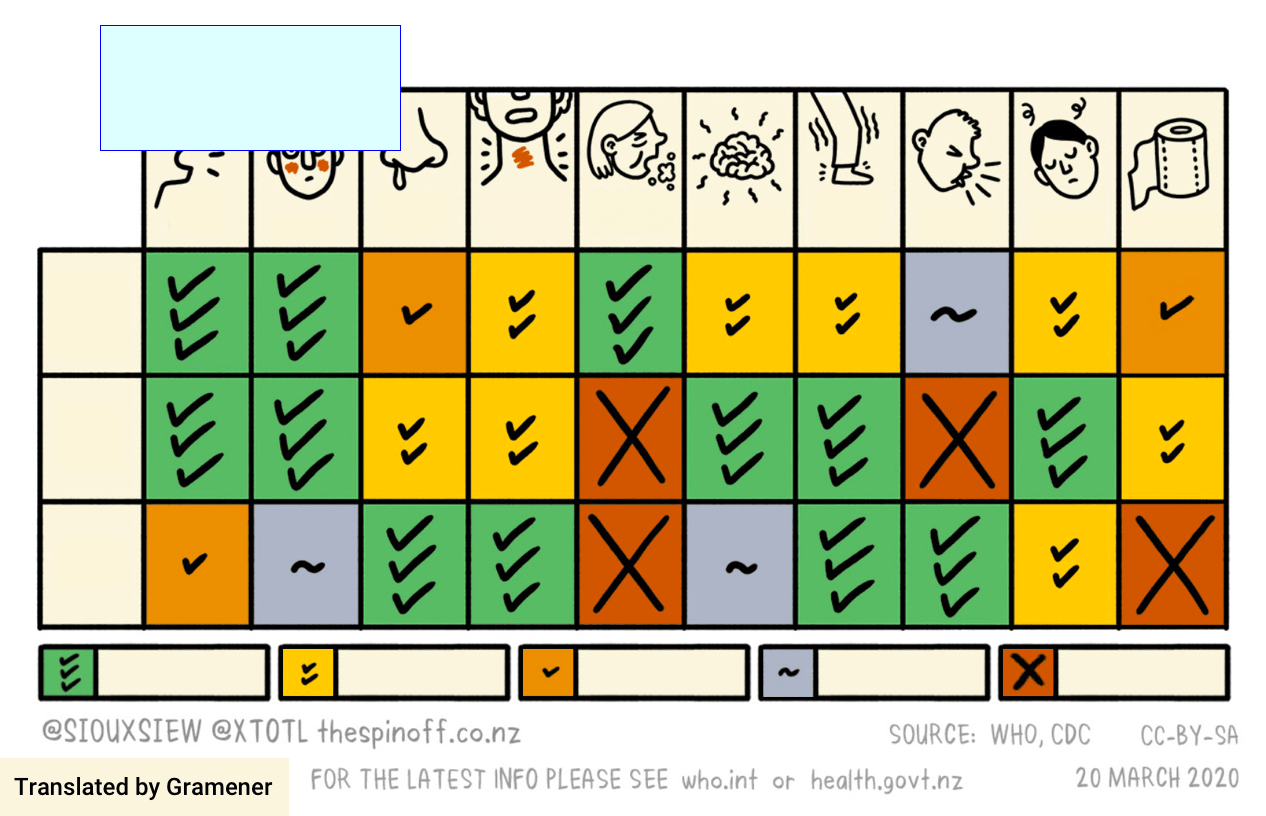

In [28]:
img

In [29]:
from dataclasses import dataclass

@dataclass
class Box:
    L: int = 0
    T: int = 0
    R: int = 0
    B: int = 0

    def pad(self, p=5):
        self.L, self.T = self.L + p, self.T + p
        self.R, self.B = self.R - p, self.B - p

def draw_clean_text(draw, text, lang, box, spacing=-15, pad=10):
    box.pad(pad)
    W, H = (box.R - box.L), (box.B - box.T) 
    F = ImageFont.truetype(font=str(lang), size=1)
    
    size = 1
    while F.getsize_multiline(text, spacing=spacing)[0] < W:
        size += 1
        F = ImageFont.truetype(font=str(lang), size=size)
        
    F = ImageFont.truetype(font=str(lang), size=size-1)
    w, h = F.getsize_multiline(text)
    
    cx = (W - w) / 2 + box.L
    cy = (H - h) / 2 + box.T
    
    draw.multiline_text((cx, cy), text, fill='black', font=F, align='center', spacing=spacing)

In [30]:
box = Box(100, 25, 400, 150)
draw_clean_text(draw, HINDI_TEXT_BIG, hindi, box)

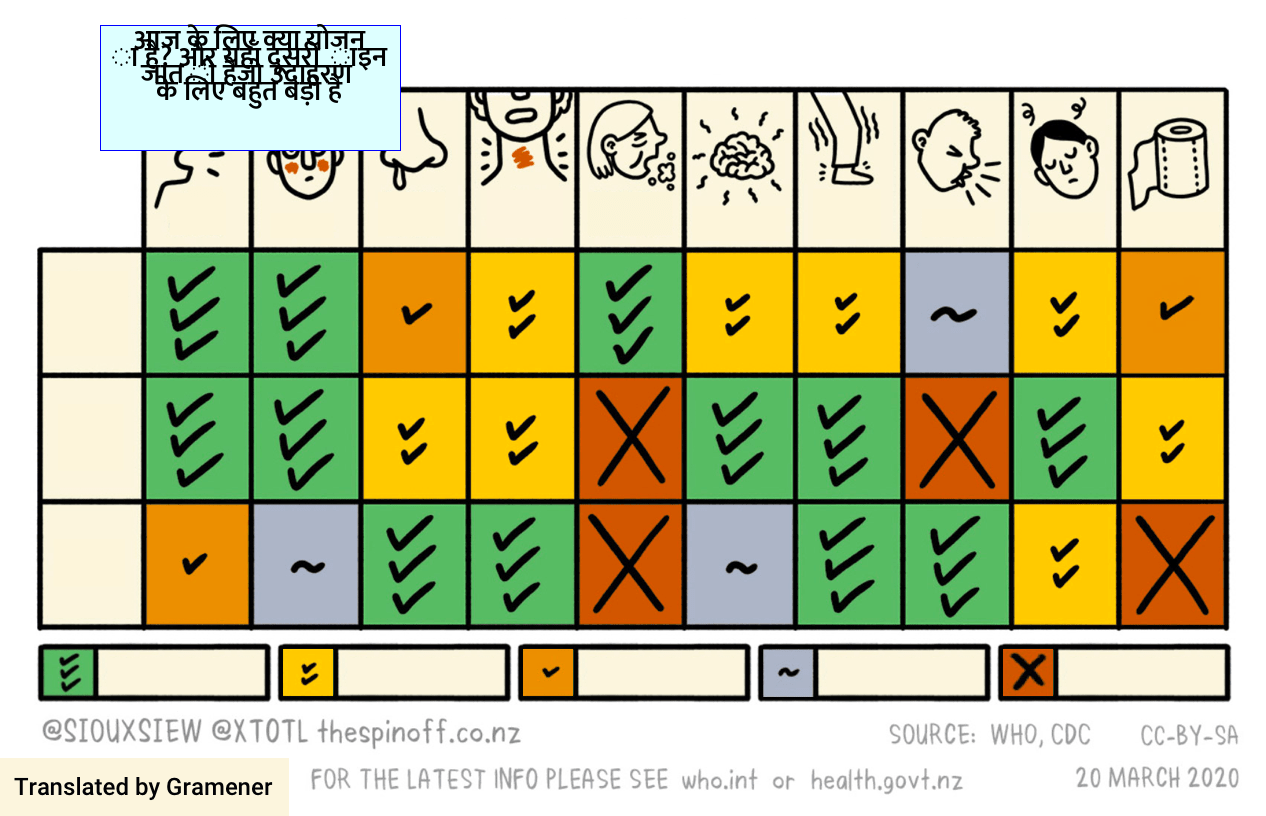

In [31]:
img